# gan: Mini-Challenge 1 - die Zahl Pi ($\pi$)

Die Zahl $\pi$ ist eine mathematische Konstante, welche über das Verhältnis aus Umfang zu Durchmesser eines Kreises definiert ist:

$$\pi=\frac{U}{d}$$

$\pi$ ist eine irrationale Zahl und wir können sie nur Näherungsweise als Dezimalzahl angeben (hier $\pi$ mit den ersten $500$ Nachkommastellen):

$$\begin{eqnarray*}
3.&&1415926535\;8979323846\;2643383279\;5028841971\;6939937510\\
&&5820974944\;5923078164\;0628620899\;8628034825\;3421170679\\
&&8214808651\;3282306647\;0938446095\;5058223172\;5359408128\\
&&4811174502\;8410270193\;8521105559\;6446229489\;5493038196\\
&&4428810975\;6659334461\;2847564823\;3786783165\;2712019091\\
&&4564856692\;3460348610\;4543266482\;1339360726\;0249141273\\
&&7245870066\;0631558817\;4881520920\;9628292540\;9171536436\\
&&7892590360\;0113305305\;4882046652\;1384146951\;9415116094\\
&&3305727036\;5759591953\;0921861173\;8193261179\;3105118548\\
&&0744623799\;6274956735\;1885752724\;8912279381\;8301194912\;\ldots\end{eqnarray*}$$

In dieser Mini-Challenge wollen wir uns mit der Geschichte der Zahl $\pi$ auseinandersetzen und einige Möglichkeiten anschauen, wie man die Nachkommastellen von $\pi$ berechnen kann. 

## 1. Die Geschichte der Zahl $\pi$

Historische Dokumente belegen, dass sich die Menschheit schon sehr lange mit der Zahl $\pi$ beschäftigt.

<b><font color="red">Aufgabe</font></b>: Recherchieren Sie mindestens 5 Quellen, welche einen Bezug zu $\pi$ aufzeigen und geben Sie diese in chronologischer Reihenfolge an:

<table><tr>
    <td><b>Zeitpunkt</b></td><td><b>Berechnungsprinzip</b></td><td><b>Näherungswert</b></td><td><b>Genauigkeit</b></td><td><b>Quelle</b></td></tr>
    <tr><td></td><td></td><td></td><td></td><td></td></tr>
        <tr><td></td><td></td><td></td><td></td><td></td></tr>    <tr><td></td><td></td><td></td><td></td><td></td></tr>    <tr><td></td><td></td><td></td><td></td><td></td></tr>    <tr><td></td><td></td><td></td><td></td><td></td></tr>    <tr><td></td><td></td><td></td><td></td><td></td></tr></table>
        

## 2. Zwei (klassische) Berechnungsmethoden

### Archimedes

Der Philosoph, Mathematiker und Physiker Archimedes (287-212 v.Chr.) hat basierend auf der Definition von $\pi$ die Zahl auf zwei Nachkommastellen angenähert. Dazu hat er einem Einheitskreis ($r=1$) ein Sechseck Um- und Eingeschrieben. Den Kreisumfang $U=2r\pi=2\pi$ konnte er zwar nicht numerisch bestimmen, mit den beiden Sechsecken konnte er aber den Kreisumfang abschätzen:

<img src="regulaeres_n_eck_in_und_um_einheitskreis.PNG">

<b><font color="red">Aufgabe:</font></b>

1. Nähern Sie $\pi$ gemäss dem Vorgehen von Archimedes an (Achtung: nur mit den Elementen der klassischen Geometrie, d.h. ohne trigonometrische Funktionen!).

2. Erweitern Sie das Verfahren, indem Sie die Eckenzahl fortlaufend verdoppeln ($6$, $12$, $24$, $48$, $96$, ...). Wie verbessert sich die Genauigkeit der Näherung bei diesem Vorgehen?

3. Stellen Sie den Zusammenhang Anzahl korrekter Nachkommastellen der Näherung für $\pi$ in Abhängigkeit von $n$ grafisch dar.

In [188]:
import math

s = 1
approxes = []

for i in range(10):
    n = 6 * 2 ** i

    s = s / 2
    a = math.sqrt(1 - s ** 2)
    b = 1 - a
    s = math.sqrt(b ** 2 + s ** 2)

    value = s * n

    print(f'n: {n}, approx value: {value}, error: {math.pi - value}')
    approxes.append(value)



n: 6, approx value: 3.105828541230249, error: 0.03576411235954424
n: 12, approx value: 3.1326286132812378, error: 0.008964040308555354
n: 24, approx value: 3.1393502030468667, error: 0.0022424505429263775
n: 48, approx value: 3.14103195089051, error: 0.000560702699283322
n: 96, approx value: 3.1414524722854624, error: 0.00014018130433068876
n: 192, approx value: 3.141557607911858, error: 3.504567793521929e-05
n: 384, approx value: 3.1415838921483186, error: 8.761441474547382e-06
n: 768, approx value: 3.1415904632280505, error: 2.190361742648861e-06
n: 1536, approx value: 3.1415921059992717, error: 5.475905213714327e-07
n: 3072, approx value: 3.1415925166921577, error: 1.368976354498841e-07


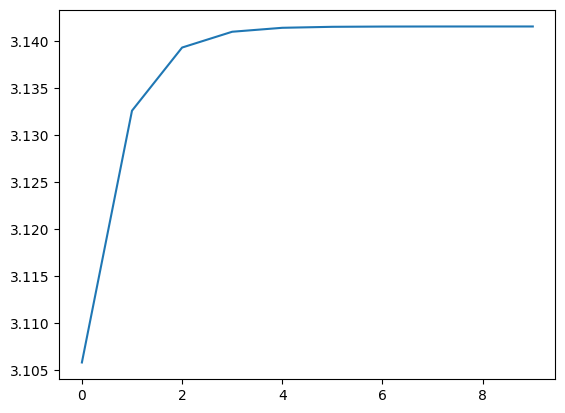

In [189]:
import matplotlib.pyplot as plt

plt.plot([n for n in range(0, len(approxes))], approxes)
plt.show()

### Zufall und $\pi$ (Monte-Carlo-Methode)

Die Zahl $\pi$ kann auch über das Flächenverhältnis eines Kreises (Radius $r$) zu einem Quadrat (Seitenlänge $s=2r$ - Kreis ist dem Quadrat einbeschrieben) definiert werden:

$$\frac{A_{Kreis}}{A_{Quadrat}}=\frac{r^2\cdot \pi}{\left(2r\right)^2}=\frac{\pi}{4}$$

Um nun eine Näherung für $\pi$ zu finden, wird mit einem Zufallsgenerator auf eine quadratische Zielscheibe ($-1\leq x \leq 1$ und $-1\leq y \leq 1$) geschossen ($n$ Schüsse). Befindet sich der Schuss innerhalb des Einheitskreises (Abstand zum Koordinatenursprung kleiner-gleich $1$) so zählen wir den Schuss zu den Treffern. Das Flächenverhältnis lässt sich nun als Verhältnis der Treffer $n_T$ zu den Schüssen $n$ beschreiben:

$$\frac{A_{Kreis}}{A_{Quadrat}}=\frac{\pi}{4}=\frac{n_T}{n}$$

<b><font color="red">Aufgabe:</font></b> Implementieren Sie die oben beschriebene Monte-Carlo-Simulation in Python und bestimmen Sie Näherungswerte für $\pi$ in Abhängigkeit der Anzahl Schüsse $n$ (tabellarische Darstellung). Was kann über den Zusammenhang Genauigkeit und Anzahl Schüsse ausgesagt werden (qualitativ)?

In [190]:
from random import random

def get_rand_cord():
    return random() * -1 if random() > 0.5 else random()

for i in range(20):
    hits = 0
    n = 2 ** (i + 1)

    for n in range(n):
        x,y = get_rand_cord(), get_rand_cord()
        dist = math.sqrt(x ** 2 + y ** 2)

        if dist <= 1:
            hits = hits + 1

    print(f'n: {n}, hits: {hits}, value: {(4 * hits) / n}')

n: 1, hits: 2, value: 8.0
n: 3, hits: 2, value: 2.6666666666666665
n: 7, hits: 6, value: 3.4285714285714284
n: 15, hits: 13, value: 3.466666666666667
n: 31, hits: 31, value: 4.0
n: 63, hits: 51, value: 3.238095238095238
n: 127, hits: 98, value: 3.0866141732283463
n: 255, hits: 200, value: 3.1372549019607843
n: 511, hits: 397, value: 3.107632093933464
n: 1023, hits: 786, value: 3.0733137829912023
n: 2047, hits: 1604, value: 3.134342940889106
n: 4095, hits: 3269, value: 3.1931623931623934
n: 8191, hits: 6425, value: 3.137590037846417
n: 16383, hits: 12899, value: 3.1493621436855275
n: 32767, hits: 25808, value: 3.1504867702261423
n: 65535, hits: 51549, value: 3.1463492790112153
n: 131071, hits: 103347, value: 3.153924209016487
n: 262143, hits: 205994, value: 3.143230984615267
n: 524287, hits: 411433, value: 3.138990667325339
n: 1048575, hits: 823438, value: 3.1411696826645685


## 3. Zahlenreihen und die Zahl $\pi$

Eine sehr schöne Technik um die Zahl $\pi$ (und auch andere irrationale Zahlen) anzunähern basiert auf unendlichen Summen (Zahlenreihen). Eine der bekanntesten Reihen ist nach dem deutschen Mathematiker Gottfried Wilhelm Leibniz benannt:

$$\sum_{k=0}^{\infty}{\frac{\left(-1\right)^k}{2k+1}}=1-\frac{1}{3}+\frac{1}{5}-\frac{1}{7}+\frac{1}{9}-+\ldots=\frac{\pi}{4}$$

Der Vorteil einer solchen (konvergenten) unendlichen Summe ist, dass wenn die ersten $n$-Summanden zusammengezählt werden ein Näherungswert mit einer bestimmten Genauigkeit resultiert. Möchte man die Genauigkeit erhöhen, müssen einfach weitere Summanden dazugezählt werden.

Der Zusammenhang zwischen Zahlenreihen und bestimmten irrationalen Zahlen basiert auf der Möglichkeit bestimmte Funktionen als unendliche Summe von Potenzfunktionen zu beschreiben (Potenzreihen, Taylorreihen, MacLaurin'sche Reihe). Es gilt z.B. für die $\arctan$-Funktion (wenn $\left|x\right|\leq 1$ gilt):

$$\arctan\left(x\right)=\sum_{k=0}^{\infty}{\left(-1\right)^k\frac{x^{2k+1}}{2k+1}}=x-\frac{x^3}{3}+\frac{x^5}{5}-\frac{x^7}{7}+\frac{x^9}{9}-+\ldots$$

Da der Funktionswert der $\arctan$-Funktion an der Stelle $x=1$ gleich $\frac{\pi}{4}$ ist kann mit der Potenzreihe $\pi$ berechnet werden (man erhält hier gerade die obige Formel von Leibniz)!

<b><font color="red">Aufgabe:</font></b>

1. Bestimmen Sie mit der Formel von Leibniz $\pi$ auf $5$ Stellen genau. Wieviele Summanden sind nötig um diese Genauigkeit zu erhalten?

2. Finden Sie weitere, schnellere Summenformeln, mit welchen man die Zahl $\pi$ annähern kann.

In [12]:
### Ihr Code:
n = 10 ** 7
print(f'done. pi: {sum(((-1) ** k)/(2*k + 1) for k in range(n)) * 4}')


done. pi: 3.1415925535897915
